# Slim Chickens End of Year Analytics

In [1]:
import sys
sys.path.append('../../')
from env import conn

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cs = conn.cursor()

In [3]:
def execute_query(query):
    try:
        cur = conn.cursor()
        cur.execute(query)

        df = pd.DataFrame(cur.fetchall(), columns=[col[0] for col in cur.description])
        return df
    finally:
        cur.close()

In [18]:
query = """select * from PROD.BINK_SECURE.FACT_TRANSACTION
        where loyalty_plan_company = 'Slim Chickens'
         order by event_date_time;"""

df = execute_query(query)

In [19]:
df.head()

,EVENT_ID,EVENT_DATE_TIME,USER_ID,EXTERNAL_USER_REF,CHANNEL,BRAND,TRANSACTION_ID,PROVIDER_SLUG,FEED_TYPE,DUPLICATE_TRANSACTION,...,SPEND_CURRENCY,LOYALTY_ID,LOYALTY_CARD_ID,MERCHANT_ID,PAYMENT_ACCOUNT_ID,SETTLEMENT_KEY,AUTH_CODE,APPROVAL_CODE,INSERTED_DATE_TIME,UPDATED_DATE_TIME
0,13528374,2023-10-19 15:13:22.720260,1061564,LTBNR304392,LLOYDS,LLOYDS,483292548001715,slim-chickens,None,False,...,GBP,jess.jones4@e2e.bink.com,547317,33919554,774328,ed4b154da2d07fc6e0e13b8a0d0549e2504cf1941e07ce...,019455,,2023-11-27 11:44:28.631,2023-11-27 11:44:28.631
1,13689972,2023-10-23 18:42:38.702804,1071120,HFXLDN03864,LLOYDS,HALIFAX,483296673566678,slim-chickens,None,False,...,GBP,jess.jones3@e2e.bink.com,547122,42934354,1615945,a67ef9f024960d25345a3e811f79e6ba5be43fe89ded63...,023014,,2023-11-27 11:44:28.631,2023-11-27 11:44:28.631
2,13689995,2023-10-23 18:43:11.876846,1071120,HFXLDN03864,LLOYDS,HALIFAX,483296673907664,slim-chickens,None,False,...,GBP,jess.jones3@e2e.bink.com,547122,42934354,1615945,08e62180828e8b0b8952bd30c0f1b12f29522925a871a0...,023015,,2023-11-27 11:44:28.631,2023-11-27 11:44:28.631
3,13721361,2023-10-24 10:57:08.243105,1071120,HFXLDN03864,LLOYDS,HALIFAX,483297394265106,slim-chickens,None,False,...,GBP,jess.jones1@e2e.bink.com,549934,44451974,1744363,439c4eda67f55ac2e6a68b9c07f8a25798d00a92207d48...,024714,,2023-11-27 11:44:28.631,2023-11-27 11:44:28.631
4,14116252,2023-11-02 21:10:26.532170,1807025,LTBKE729988,LLOYDS,LLOYDS,483304516078452,slim-chickens,None,False,...,GBP,sarah.armstrong1@e2e.bink.com,552426,42931004,1852888,db0a2b02cd5c89fb36f9ef49ece74051688e16795eaa82...,031058,,2023-11-27 11:44:28.631,2023-11-27 11:44:28.631


In [20]:
df.describe()

,EVENT_ID,EVENT_DATE_TIME,TRANSACTION_DATE,SPEND_AMOUNT,INSERTED_DATE_TIME,UPDATED_DATE_TIME
count,2.500000e+01,25,25,25.000000,25,25
mean,1.510096e+07,2023-11-17 18:17:04.470273280,2023-11-17 10:21:07.280000,18.810000,2023-11-28 14:16:01.920280064,2023-11-28 14:16:01.920280064
min,1.352837e+07,2023-10-19 15:13:22.720260,2023-10-19 15:13:20,8.900000,2023-11-27 11:44:28.631000,2023-11-27 11:44:28.631000
25%,1.453625e+07,2023-11-10 16:53:29.162350080,2023-11-10 16:53:27,10.950000,2023-11-27 11:44:28.631000064,2023-11-27 11:44:28.631000064
50%,1.538145e+07,2023-11-22 22:37:23.292582912,2023-11-22 13:26:58,15.450000,2023-11-27 11:44:28.631000064,2023-11-27 11:44:28.631000064
75%,1.558009e+07,2023-11-25 21:03:11.017353984,2023-11-25 21:03:09,25.150000,2023-11-27 11:44:28.631000064,2023-11-27 11:44:28.631000064
max,1.624940e+07,2023-12-04 17:49:13.026709,2023-12-04 13:16:06,33.400000,2023-12-05 02:17:04.659000,2023-12-05 02:17:04.659000
std,8.372858e+05,NaN,NaN,8.697377,NaN,NaN


In [21]:
df.columns

Index(['EVENT_ID', 'EVENT_DATE_TIME', 'USER_ID', 'EXTERNAL_USER_REF',
       'CHANNEL', 'BRAND', 'TRANSACTION_ID', 'PROVIDER_SLUG', 'FEED_TYPE',
       'DUPLICATE_TRANSACTION', 'LOYALTY_PLAN_NAME', 'LOYALTY_PLAN_COMPANY',
       'TRANSACTION_DATE', 'SPEND_AMOUNT', 'SPEND_CURRENCY', 'LOYALTY_ID',
       'LOYALTY_CARD_ID', 'MERCHANT_ID', 'PAYMENT_ACCOUNT_ID',
       'SETTLEMENT_KEY', 'AUTH_CODE', 'APPROVAL_CODE', 'INSERTED_DATE_TIME',
       'UPDATED_DATE_TIME'],
      dtype='object')

In [22]:
df["EXTERNAL_USER_REF"] = df["EXTERNAL_USER_REF"].apply(hash)

df_agg = df.groupby(by="EXTERNAL_USER_REF", ).agg(
    TRANSACTION_ID_count=('TRANSACTION_ID', 'count'),
    SPEND_AMOUNT_sum = ('SPEND_AMOUNT','sum'),
    SPEND_AMOUNT_mean = ('SPEND_AMOUNT','mean'),
    SPEND_AMOUNT_min = ('SPEND_AMOUNT','min', ),
    SPEND_AMOUNT_max = ('SPEND_AMOUNT','max', ),
    SPEND_AMOUNT_range = ('SPEND_AMOUNT',lambda x: x.max() - x.min()),
    EVENT_DATE_TIME_range = ('EVENT_DATE_TIME', lambda x: (x.max() - x.min()).days),
    EVENT_DATE_TIME_max = ('EVENT_DATE_TIME', 'min'),
    EVENT_DATE_TIME_min = ('EVENT_DATE_TIME', 'max'),
)

df_agg.describe()

,TRANSACTION_ID_count,SPEND_AMOUNT_sum,SPEND_AMOUNT_mean,SPEND_AMOUNT_min,SPEND_AMOUNT_max,SPEND_AMOUNT_range,EVENT_DATE_TIME_range,EVENT_DATE_TIME_max,EVENT_DATE_TIME_min
count,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20,20
mean,1.250000,23.51250,17.328333,17.195000,17.420000,0.225000,0.750000,2023-11-18 12:17:19.177577472,2023-11-19 07:53:59.876995840
min,1.000000,8.90000,8.900000,8.900000,8.900000,0.000000,0.000000,2023-10-19 15:13:22.720260,2023-10-19 15:13:22.720260
25%,1.000000,10.95000,10.950000,10.950000,10.950000,0.000000,0.000000,2023-11-11 14:38:20.027282432,2023-11-11 14:38:20.027282432
50%,1.000000,15.95000,14.450000,14.450000,14.450000,0.000000,0.000000,2023-11-22 22:37:22.981736960,2023-11-23 00:39:44.807433984
75%,1.000000,24.21250,21.650000,21.650000,21.650000,0.000000,0.000000,2023-11-24 16:42:26.286109440,2023-11-29 01:58:17.805127424
max,3.000000,98.20000,32.733333,31.400000,33.400000,2.000000,8.000000,2023-12-04 17:49:13.026709,2023-12-04 17:49:13.026709
std,0.638666,21.87312,7.790186,7.569188,7.954449,0.617188,2.314144,NaN,NaN


In [23]:
df_agg.columns

Index(['TRANSACTION_ID_count', 'SPEND_AMOUNT_sum', 'SPEND_AMOUNT_mean',
       'SPEND_AMOUNT_min', 'SPEND_AMOUNT_max', 'SPEND_AMOUNT_range',
       'EVENT_DATE_TIME_range', 'EVENT_DATE_TIME_max', 'EVENT_DATE_TIME_min'],
      dtype='object')

In [26]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, -9018015435856342972 to 8722798144082161172
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   TRANSACTION_ID_count   20 non-null     int64         
 1   SPEND_AMOUNT_sum       20 non-null     float64       
 2   SPEND_AMOUNT_mean      20 non-null     float64       
 3   SPEND_AMOUNT_min       20 non-null     float64       
 4   SPEND_AMOUNT_max       20 non-null     float64       
 5   SPEND_AMOUNT_range     20 non-null     float64       
 6   EVENT_DATE_TIME_range  20 non-null     int64         
 7   EVENT_DATE_TIME_max    20 non-null     datetime64[ns]
 8   EVENT_DATE_TIME_min    20 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int64(2)
memory usage: 1.6 KB


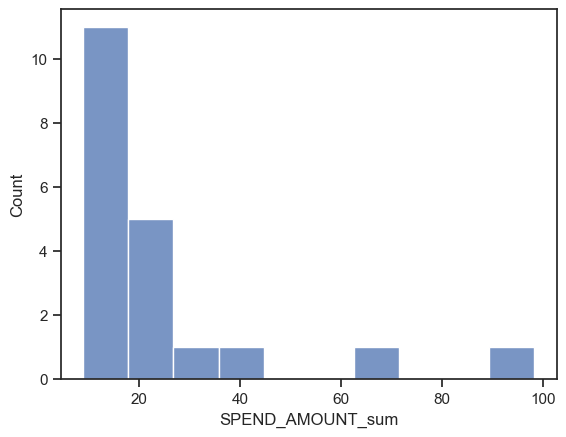

In [28]:
plot = sns.histplot(data=df_agg, x=df_agg['SPEND_AMOUNT_sum'])

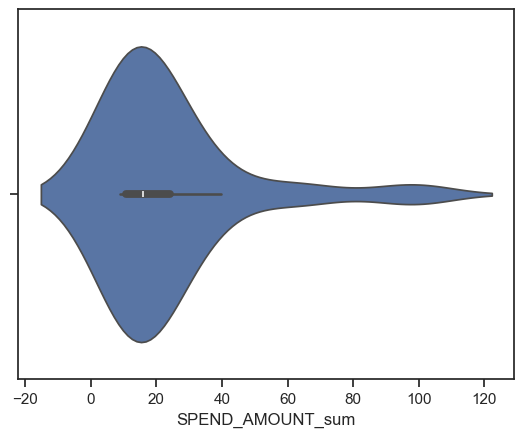

In [29]:
plot = sns.violinplot(data=df_agg, x=df_agg['SPEND_AMOUNT_sum'])

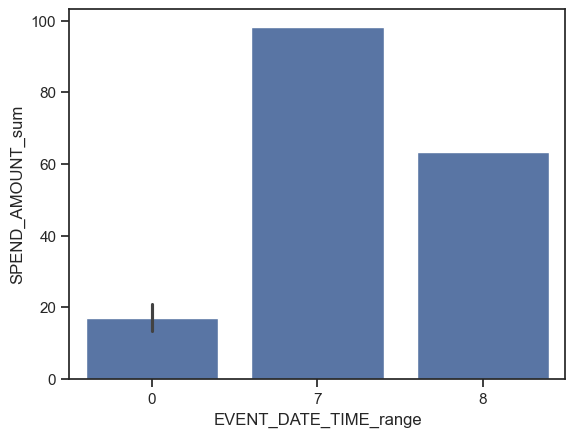

In [30]:
plot = sns.barplot(data=df_agg, x=df_agg['EVENT_DATE_TIME_range'], y=df_agg['SPEND_AMOUNT_sum'])

<Axes: >

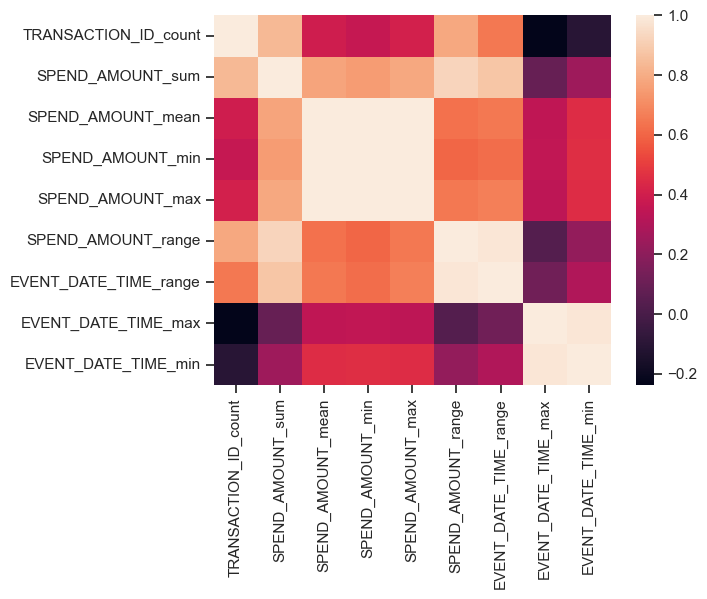

In [39]:
corr = df_agg.corr()
sns.heatmap(corr)